# Chennai House Price Prediction Model


## Data Description


### House Features
##### INT_SQFT – The interior Sq. Ft of the property
##### N_BEDROOM – The number of Bed rooms
##### N_BATHROOM - The number of bathrooms
##### N_ROOM – Total Number of Rooms
##### QS_ROOMS – The quality score assigned for rooms based on buyer reviews
##### QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
##### QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
##### QS_OVERALL – The Overall quality score assigned for the property
##### SALE_COND – The Sale Condition
##### Normal: Normal Sale
##### Abnorml: Abnormal Sale - trade, foreclosure, short sale
##### AdjLand: Adjoining Land Purchase
##### Family: Sale between family members
##### Partial: Home was not completed when last assessed
##### BUILDTYPE – The type of building
###### House
###### Commercial
###### Others
### Surrounding and Locality
##### AREA – The property in which the real estate is located
##### DIST_MAINROAD – The distance of the property to the main road
##### PARK_FACIL – Whether parking facility is available
##### UTILITY_AVAIL
###### AllPub: All public Utilities (E,G,W,& S)
###### NoSewr: Electricity, Gas, and Water (Septic Tank)
###### NoSeWa: Electricity and Gas Only
###### ELO: Electricity only
##### STREET
###### Gravel
###### Paved
###### No Access
##### MZZONE
###### A: Agriculture
###### C: Commercial
###### I: Industrial
###### RH: Residential High Density
###### RL: Residential Low Density
###### RM: Residential Medium Density
### House Sale Price
##### PRT_ID – The Property Transaction ID assigned by ChennaiEstate
##### COMMIS – The Commission paid to the agent
##### SALES_PRICE – The total sale price 

# Loading the Dataset

In [256]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [257]:
df = pd.read_csv("chennai_house_price_prediction.csv")
df.shape

(7109, 19)

In [258]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Exploring Dataset

In [259]:
df.describe() 

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [260]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P02757,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [261]:
#Checking missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [262]:
#checking continuous and categorical data
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [263]:
#creating seperate dataframe for missing values and unique values in each column
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [264]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


## Univariate Analysis

Text(0.5, 0, 'Sales')

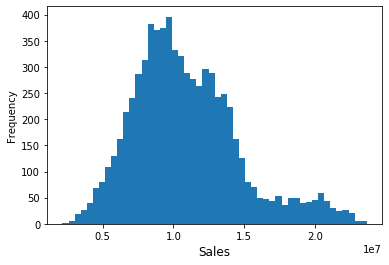

In [265]:
#plotting histogram for target variable 

df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize=12)


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0, 'Sales')

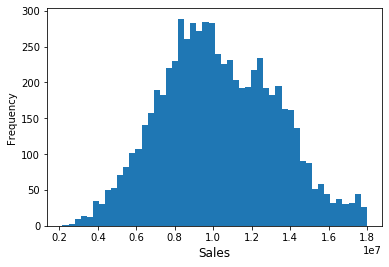

In [266]:
print((df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50))
plt.xlabel('Sales', fontsize=12)

Text(0.5, 0, 'Area in sq feet')

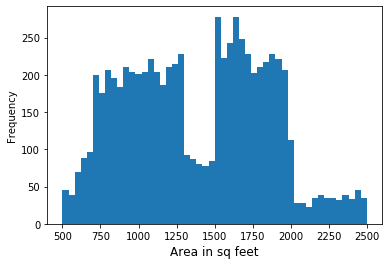

In [267]:
#Plotting histogram for Area of house in Square feet

df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

In [268]:
#grouping by unique number of bedrooms

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [269]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

In [270]:
#grouping by unique number of rooms

df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [271]:
#grouping by unique number of bathrooms

df['N_BATHROOM'].value_counts()/len(df)

1.0    0.786187
2.0    0.213110
Name: N_BATHROOM, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Count')

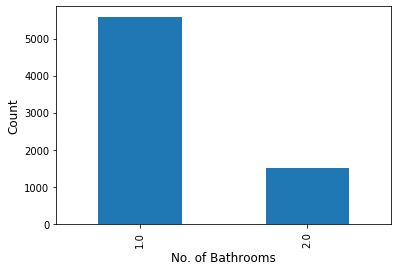

In [272]:
#bar graph for pecentage of bathrooms

print(df['N_BATHROOM'].value_counts().plot(kind = 'bar'))
plt.xlabel('No. of Bathrooms',fontsize=12)
plt.ylabel('Count',fontsize=12)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Count')

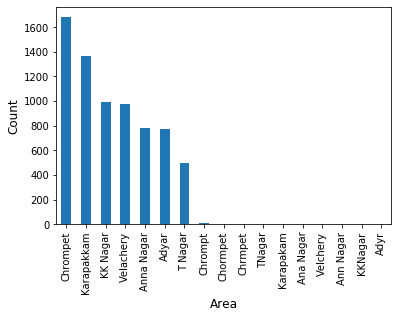

In [273]:
#bar graph for percentage of area 

print(df['AREA'].value_counts().plot(kind = 'bar'))
plt.xlabel('Area',fontsize=12)
plt.ylabel('Count',fontsize=12)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Count')

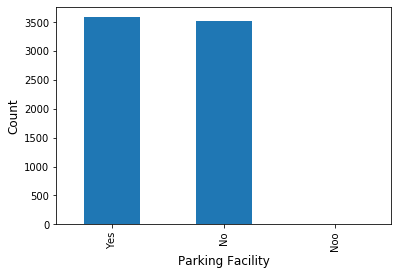

In [274]:
#bar graph for houses with parking facility

print(df['PARK_FACIL'].value_counts().plot(kind = 'bar'))
plt.xlabel('Parking Facility',fontsize=12)
plt.ylabel('Count',fontsize=12)

In [275]:
print(df['PARK_FACIL'].value_counts())

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64


# Manipulating Data

In [276]:
df.drop_duplicates()


,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [277]:
print(df.drop_duplicates(subset=['AREA']).shape)

(17, 19)


In [278]:
df.shape

(7109, 19)

# Treating Missing Values

In [279]:
# missing values

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [280]:
#dropping rows with missing values

df.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [281]:
df.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


In [282]:
#treating missing values in bedrooms

df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [283]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]), inplace=True)

In [284]:
#Treating missing values in bathroom column

df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [285]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

In [286]:
#treating missing values in QS_OVERALL

df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [287]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [288]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [289]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [290]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [291]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [292]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [293]:
#updating data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [294]:
#checking for wrong categories
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE

In [295]:
#updating names in PARK_FACIL column 

df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [296]:
#updating names in AREA column

df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [297]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [298]:
#updating names in SALE_COND column

df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [299]:
#updating names in BUILDTYPE column

df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [300]:
#updating names in UTILITY_AVAIL column

df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [301]:
#updating names in STREET column

df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

# BIVARIATE ANALYSIS

In [302]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


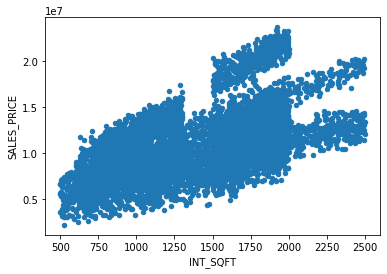

In [303]:
#plot between interior area and sales price (target)

print(df.plot.scatter('INT_SQFT','SALES_PRICE'))

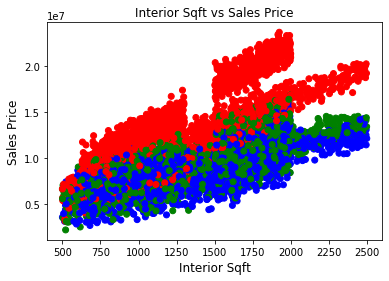

In [304]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.title('Interior Sqft vs Sales Price')
plt.xlabel('Interior Sqft',fontsize=12)
plt.ylabel('Sales Price',fontsize=12)
plt.show()

In [305]:
#plot of sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


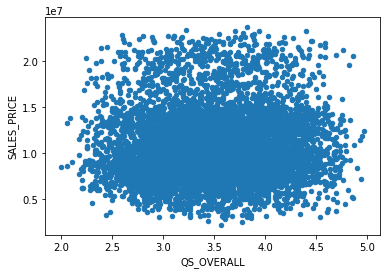

In [306]:
#plot between QS_OVERALL and sales price

df.plot.scatter('QS_OVERALL', 'SALES_PRICE')


Text(0.5, 1.0, 'QS_OVERALL')

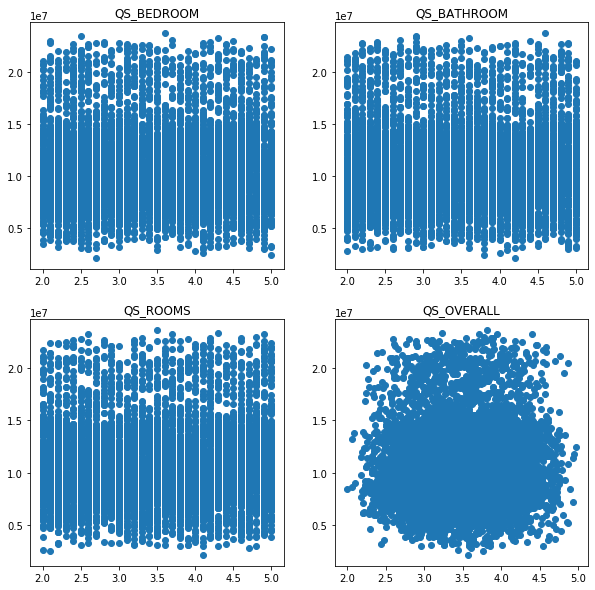

In [307]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')



AxesSubplot(0.125,0.125;0.775x0.755)


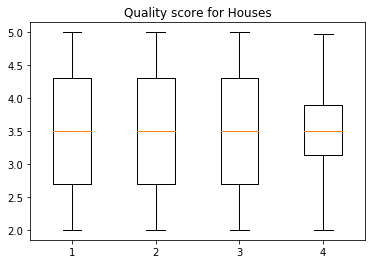

In [308]:
# Creating an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Creating the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])
print(ax)

In [309]:
#plot between SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

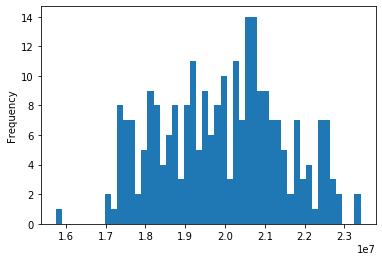

In [310]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

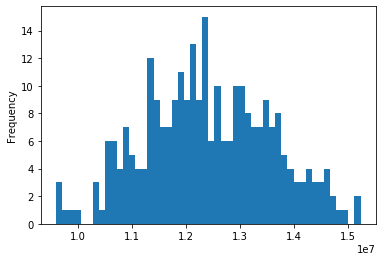

In [311]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [312]:
#plotting relation between building type and parking facility

df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

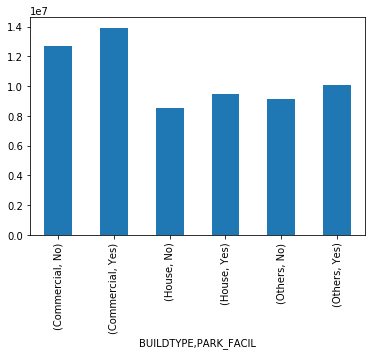

In [313]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

In [314]:
#plotting relation between area and sales price

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


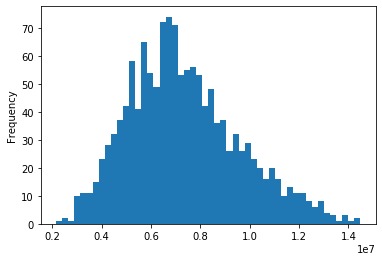

In [315]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

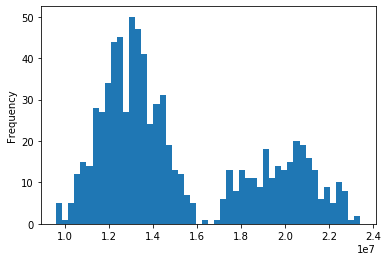

In [316]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

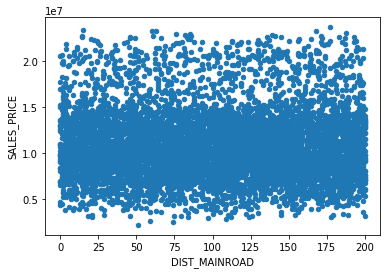

In [317]:
#plotting relation between distance from main  road and sales price

df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

In [318]:
#plotting relation between street and sales price

df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

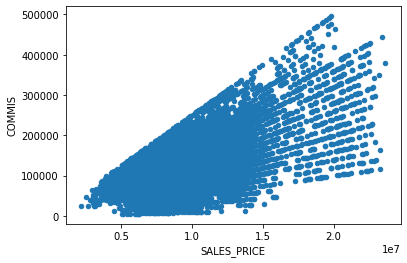

In [319]:
#plotting relation between commission and sales price

df.plot.scatter('SALES_PRICE', 'COMMIS')

In [320]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


# Predictive Models for data

In [321]:
#Linear Regression Model

df.drop(['PRT_ID'], axis=1, inplace = True)

In [322]:
df = pd.get_dummies(df)

In [323]:
x = df.drop(['SALES_PRICE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DIST_MAINROAD'], axis=1)
y= df['SALES_PRICE']

In [324]:
#splitting train and test data

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

print(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)

(4976, 43) (2133, 43) (4976,) (2133,)


In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [326]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [327]:
#evaluating model using root mean squared log error

pred_train = lreg.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [328]:
pred_test = lreg.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [330]:
print('Training score:', train_score)
print('Validation score:', valid_score)

Training score: 0.09112633276311582
Validation score: 0.09475341024202723


In [331]:
lreg.score(valid_x,valid_y)

0.9551264726321914

In [332]:
lreg.score(train_x,train_y)

0.9564067604161294

In [333]:
dp=pd.DataFrame({'Actual':valid_y,'Predicted':pred_test,'Residual':pred_test-valid_y})
dp


,Actual,Predicted,Residual
4231,14873340,1.463921e+07,-2.341288e+05
3580,5125790,4.774355e+06,-3.514352e+05
4217,10337000,1.126349e+07,9.264895e+05
4760,14554600,1.425489e+07,-2.997104e+05
6303,9505500,1.069415e+07,1.188648e+06
...,...,...,...
6745,10841340,1.053773e+07,-3.036066e+05
2753,5248500,7.183854e+06,1.935354e+06
570,15317750,1.435619e+07,-9.615632e+05
5379,13264000,1.367702e+07,4.130216e+05
